<a href="https://colab.research.google.com/github/rahulrajpr/learning/blob/main/TensorFlowDeveloperCertifcateTraining/TensorFlowDeveloperCertifcateTraining-main/05.TransferLearning/TransferLearning_Food101_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
# tensorflow version control
!pip install tensorflow==2.9.0
clear_output()
import tensorflow as tf
tf.__version__

'2.9.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import warnings 

warnings.filterwarnings('ignore')

> Download the helper function.py and make ready for the import

In [ ]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py

--2023-02-23 02:41:04--  https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12000 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.72K  --.-KB/s    in 0s      

2023-02-23 02:41:05 (87.0 MB/s) - ‘helper_functions.py’ saved [12000/12000]



In [ ]:
from helper_functions import unzip_data,walk_through_dir,plot_loss_curves,compare_historys,augmented_image_random_view

> Lets download the dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data('101_food_classes_10_percent.zip')

--2023-02-23 02:41:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  22.3MB/s    in 71s     

2023-02-23 02:42:16 (21.9 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



> Lets walkthrough the downloaded directory

In [ ]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/garlic_bread'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/pho'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/shrimp_and_grits'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/bread_pudding'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sashimi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spaghetti_carbonara'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/crab_cakes'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/panna_cotta'.
There are 0 directories and 75 images in '1

> Lets set the train and the test directories

In [ ]:
train_dir = '101_food_classes_10_percent/train'
test_dir = '101_food_classes_10_percent/test'

> Set the global varible

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

> Lets read the dataset form the downloaded data

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir, 
                                                         label_mode = 'categorical',
                                                         image_size = IMG_SIZE,
                                                         batch_size = BATCH_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                        label_mode = 'categorical',
                                                        image_size = IMG_SIZE,
                                                        batch_size = BATCH_SIZE,
                                                        shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
train_data.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

> Lets check the class features

In [ ]:
class_names = train_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
num_classes = len(class_names)
num_classes

101

### Things to be considered while building the model

 - create a callback instance for checkpoints
 - create a data augmentation model
 - build the keras.applictaion base model
 - compile and train the model

In [ ]:
check_point_path_0 = 'checkepoint_model_0'

checkpoint_0 = tf.keras.callbacks.ModelCheckpoint(filepath = check_point_path_0,
                                                  monitor = 'val_accuracy',
                                                  save_weights_only= True,
                                                  save_best_only = True)

> Create the data augmentation model using layers.____

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
tf.__version__

'2.9.0'

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape=IMG_SIZE + (3,)),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    # layers.Rescaling(scale=1./255), # rescalling is inbuilt in efficient net framework
    layers.Resizing(IMG_SIZE[0], IMG_SIZE[1])
], name='data_augmentation_model')

> Create the baseline model using Efficient NetB0 (without the top) only extract the feature matrix.

The feature matrix will then be realigned with the pooling leyar. 
The Efficient netB0 will not trained on the training data

picks image randomly from random classes of the train directory


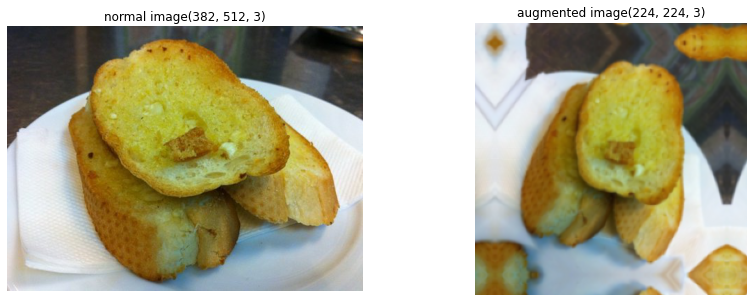

In [ ]:
augmented_image_random_view(train_dir = train_dir, augmentation_model = data_augmentation, img_size = IMG_SIZE)

> Lets create our application Model

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# create the backbone model - here

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.Input(shape = IMG_SIZE+(3,), name = 'input_layer')

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(units = num_classes, activation = 'softmax')(x)

model_0 = tf.keras.Model(inputs,outputs)

# lets compile the model

model_0.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
# fit the model

history_0 = model_0.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.15 *len(test_data)),
                        callbacks = [checkpoint_0])

Epoch 1/5
237/237 [==============================] - 63s 195ms/step - loss: 3.4507 - accuracy: 0.2554 - val_loss: 2.5237 - val_accuracy: 0.4523
Epoch 2/5
237/237 [==============================] - 39s 159ms/step - loss: 2.2901 - accuracy: 0.4837 - val_loss: 2.0951 - val_accuracy: 0.4966
Epoch 3/5
237/237 [==============================] - 36s 151ms/step - loss: 1.9125 - accuracy: 0.5485 - val_loss: 1.9513 - val_accuracy: 0.5069
Epoch 4/5
237/237 [==============================] - 39s 161ms/step - loss: 1.6981 - accuracy: 0.5877 - val_loss: 1.8740 - val_accuracy: 0.5191
Epoch 5/5
237/237 [==============================] - 35s 146ms/step - loss: 1.5293 - accuracy: 0.6244 - val_loss: 1.8024 - val_accuracy: 0.5358


In [ ]:
model_0_result = model_0.evaluate(test_data)
model_0_result

790/790 [==============================] - 66s 83ms/step - loss: 1.6280 - accuracy: 0.5703


[1.6280364990234375, 0.5702574253082275]

> Reference paper accuracy : 50.76 %

That means, we have already beaten the paper BM

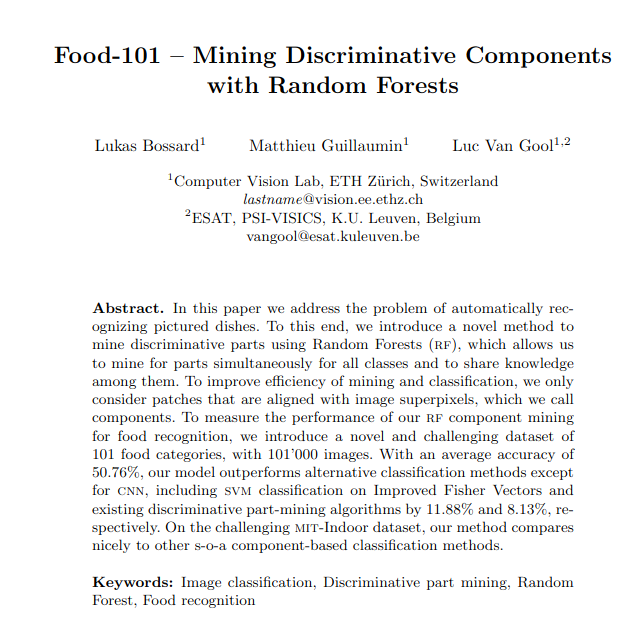

> Lets see the loss curve

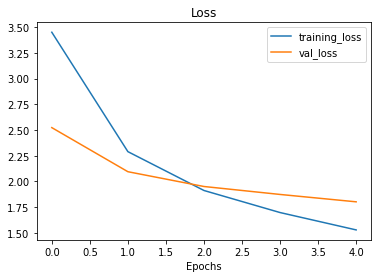

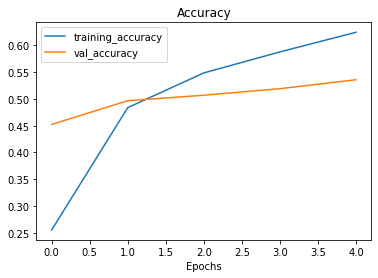

In [ ]:
plot_loss_curves(history_0)

> From the loss curve the model seems overfitting

# Lets fine tune the model by making the 5 layers of the backbone model trainable

In [ ]:
# modify the base model

base_model.trainable = True

for layer in base_model.layers[:-5]: # making all the layers freeze except the last five layers
  layer.trainable = False

In [ ]:
# recompile the model with a lower learning rate

model_0.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(lr = 0.0001),
                metrics = ['accuracy'])

In [ ]:
# lest inspect all the layers in the above model

for layer in model_0.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation_model True
efficientnetb0 True
global_average_pooling2d True
dense True


In [ ]:
# lets inspect the base model in depth

for layer in model_0.layers[2].layers:
  print(layer.name, layer.trainable)

input_1 False
rescaling False
normalization False
tf.math.truediv False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

In [ ]:
# lets fit our model 

fine_tune_epochs = 10

history_1 = model_0.fit(train_data,
                        epochs = fine_tune_epochs,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.15*len(test_data)),
                        initial_epoch = history_0.epoch[-1])

Epoch 5/10
237/237 [==============================] - 44s 150ms/step - loss: 1.2836 - accuracy: 0.6628 - val_loss: 1.8118 - val_accuracy: 0.5318
Epoch 6/10
237/237 [==============================] - 39s 160ms/step - loss: 1.1566 - accuracy: 0.6950 - val_loss: 1.7790 - val_accuracy: 0.5405
Epoch 7/10
237/237 [==============================] - 35s 146ms/step - loss: 1.0773 - accuracy: 0.7142 - val_loss: 1.8288 - val_accuracy: 0.5318
Epoch 8/10
237/237 [==============================] - 35s 147ms/step - loss: 1.0190 - accuracy: 0.7258 - val_loss: 1.7790 - val_accuracy: 0.5395
Epoch 9/10
237/237 [==============================] - 36s 149ms/step - loss: 0.9586 - accuracy: 0.7460 - val_loss: 1.7736 - val_accuracy: 0.5450
Epoch 10/10
237/237 [==============================] - 37s 153ms/step - loss: 0.8916 - accuracy: 0.7595 - val_loss: 1.8305 - val_accuracy: 0.5344


In [ ]:
# lets evaluate our fine-tuned model on the entire_testdata

model_0_result_fine_tuned1 = model_0.evaluate(test_data)
model_0_result_fine_tuned1

790/790 [==============================] - 62s 79ms/step - loss: 1.5292 - accuracy: 0.6008


[1.529220461845398, 0.6007920503616333]

> Wow we got alomost 60% accuracy

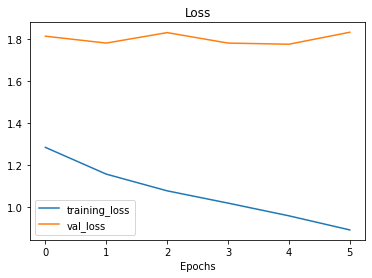

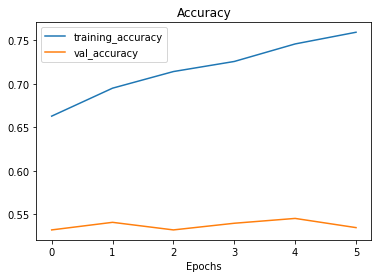

In [ ]:
plot_loss_curves(history_1)

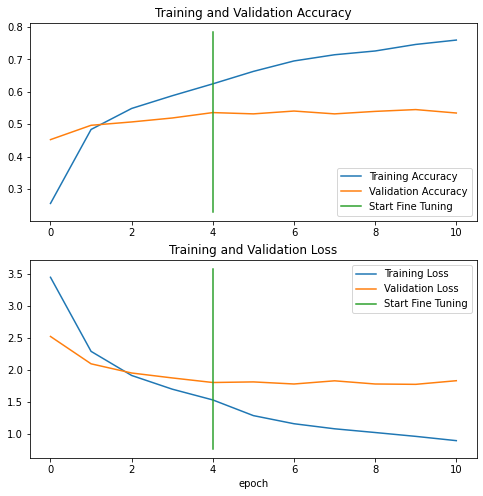

In [ ]:
compare_historys(original_history = history_0,
                 new_history = history_1,
                 initial_epochs = 5)

Inference : Clearly the fine-tuned model is overfitting on ythe

Anyway lets save this model

In [ ]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/TensorFlow Developer Certification Training/my_practice/saved_model/food_101_class_min_1'

In [ ]:
model_0.save(path)

In [ ]:
loaded_model = tf.keras.models.load_model(path)

In [ ]:
loaded_model.evaluate(test_data)

790/790 [==============================] - 65s 80ms/step - loss: 1.5292 - accuracy: 0.6008


[1.529220461845398, 0.6007920503616333]

> Lets unbatch the test data do the evalutaions 

In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 101), dtype=tf.float32, name=None))>

In [ ]:
test_data.unbatch() # tuple of images and the corresponding labels

<_UnbatchDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(101,), dtype=tf.float32, name=None))>

In [ ]:
test_labels = []

for images,labels in test_data.unbatch():
  test_labels.append(labels.numpy().argmax())
  # label is a one-hot encoded tensor - lable needs to be converted into numpy and argmax it to decode into a label 

test_labels[:10] # peinting the first 10 labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(test_labels)

25250

In [ ]:
class_names = test_data.class_names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
pred_array = loaded_model.predict(test_data)

790/790 [==============================] - 65s 81ms/step


In [ ]:
pred_labels = pred_array.argmax(axis = 1)
pred_labels

array([  0,   0,   0, ...,  56, 100, 100])

In [ ]:
len(pred_labels)

25250

> Lets plot the confusion matrix

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  
  plt.xticks(rotation = 90, fontsize = text_size)
  plt.yticks(fontsize = text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

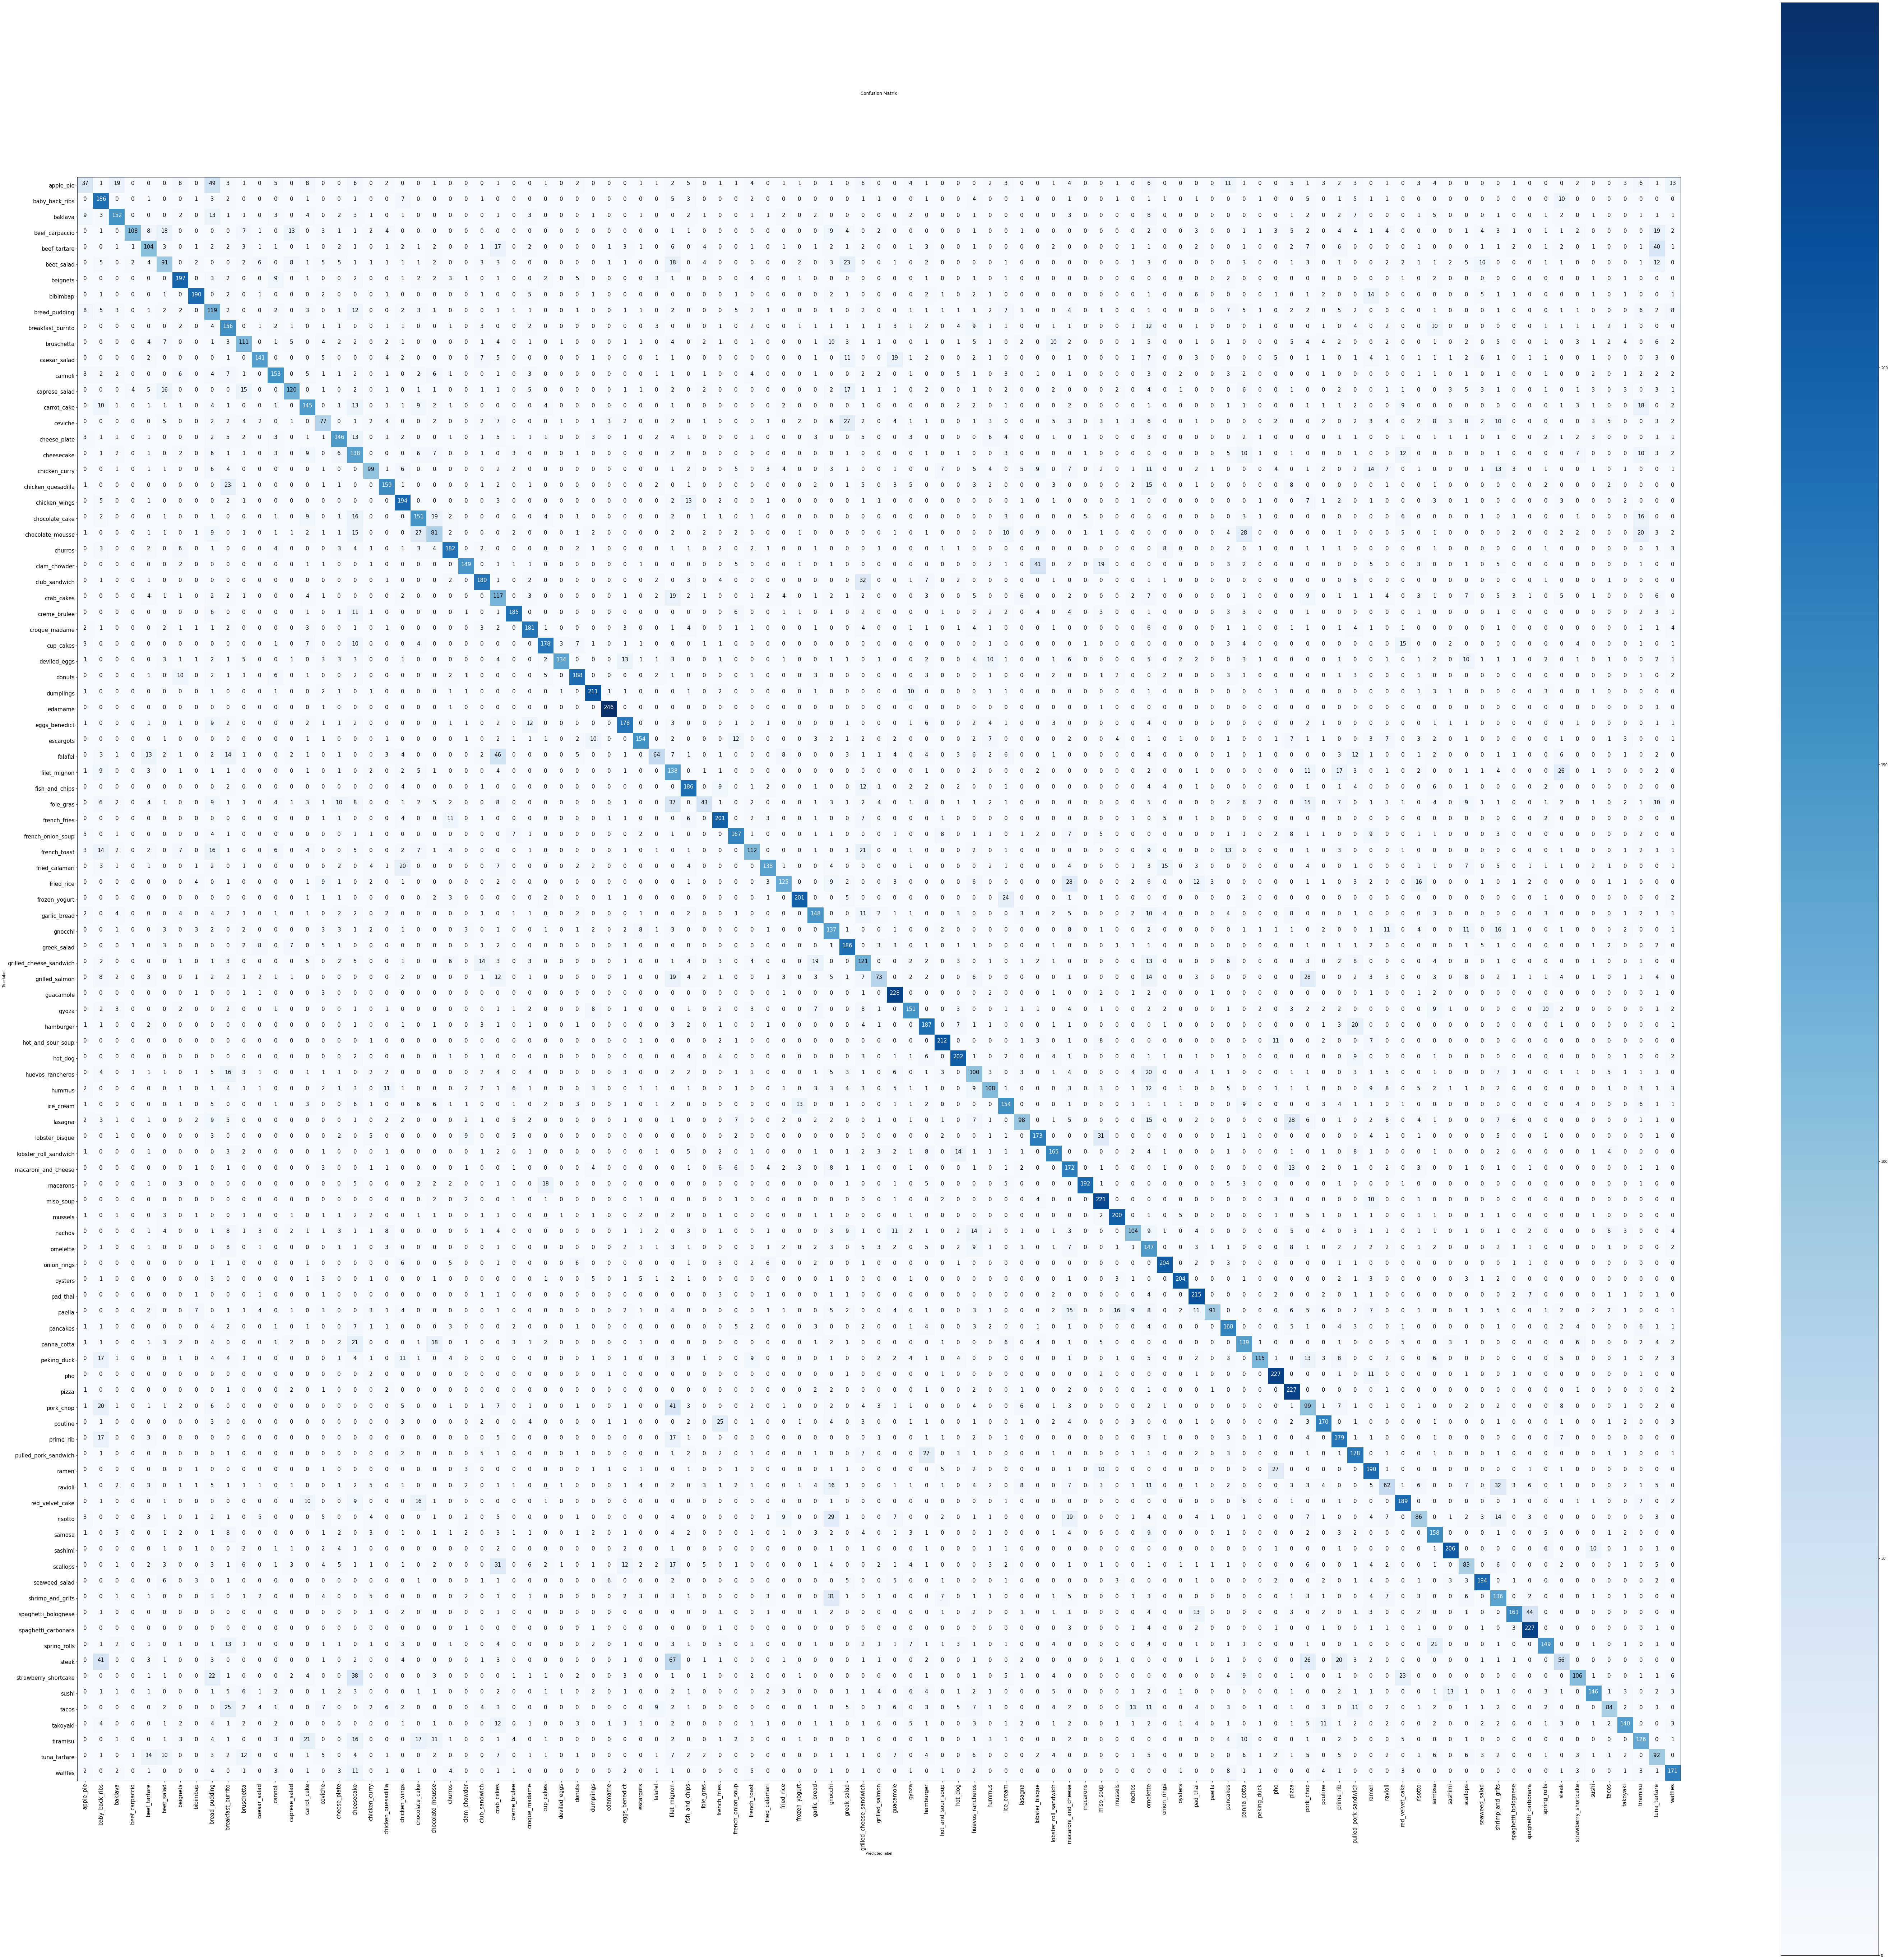

In [ ]:
make_confusion_matrix(y_true = test_labels, 
                      y_pred = pred_labels,
                      classes = class_names,
                      figsize = (100,100),
                      text_size = 15,
                      savefig = True)

> Inference : From the confusion matrix it is clear that our model is getting confused with some of the classes.

> Lets evaluate our model on the other evaluation metrics

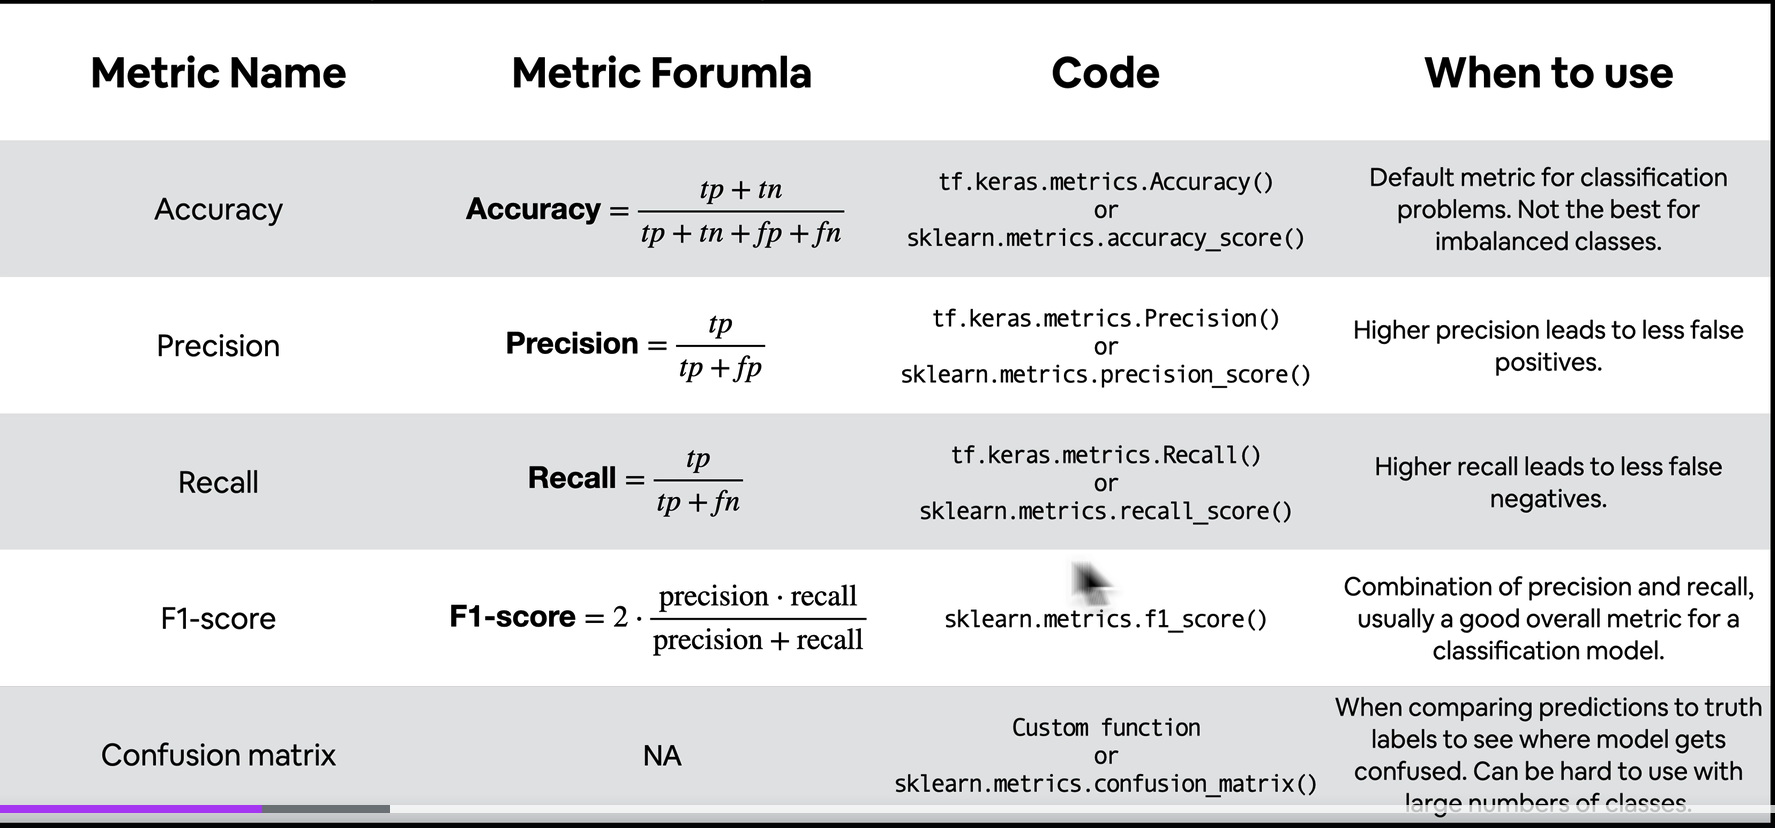

> Lets create a classification report on our model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_true = test_labels,y_pred = pred_labels, target_names = class_names)
print(report)

                         precision    recall  f1-score   support

              apple_pie       0.37      0.15      0.21       250
         baby_back_ribs       0.47      0.74      0.58       250
                baklava       0.69      0.61      0.65       250
         beef_carpaccio       0.92      0.43      0.59       250
           beef_tartare       0.48      0.42      0.45       250
             beet_salad       0.45      0.36      0.40       250
               beignets       0.71      0.79      0.75       250
               bibimbap       0.84      0.76      0.80       250
          bread_pudding       0.30      0.48      0.37       250
      breakfast_burrito       0.42      0.62      0.50       250
             bruschetta       0.52      0.44      0.48       250
           caesar_salad       0.75      0.56      0.64       250
                cannoli       0.68      0.61      0.64       250
          caprese_salad       0.68      0.48      0.56       250
            carrot_cake 

You can return the classifiaction report as dictionary

In [ ]:
report_dict = classification_report(y_true= test_labels, y_pred = pred_labels, target_names= class_names, output_dict= True)
report_dict

{'apple_pie': {'precision': 0.37,
  'recall': 0.148,
  'f1-score': 0.2114285714285714,
  'support': 250},
 'baby_back_ribs': {'precision': 0.4732824427480916,
  'recall': 0.744,
  'f1-score': 0.578538102643857,
  'support': 250},
 'baklava': {'precision': 0.6940639269406392,
  'recall': 0.608,
  'f1-score': 0.6481876332622601,
  'support': 250},
 'beef_carpaccio': {'precision': 0.9152542372881356,
  'recall': 0.432,
  'f1-score': 0.5869565217391305,
  'support': 250},
 'beef_tartare': {'precision': 0.48372093023255813,
  'recall': 0.416,
  'f1-score': 0.4473118279569892,
  'support': 250},
 'beet_salad': {'precision': 0.44607843137254904,
  'recall': 0.364,
  'f1-score': 0.4008810572687224,
  'support': 250},
 'beignets': {'precision': 0.7111913357400722,
  'recall': 0.788,
  'f1-score': 0.7476280834914611,
  'support': 250},
 'bibimbap': {'precision': 0.8370044052863436,
  'recall': 0.76,
  'f1-score': 0.7966457023060797,
  'support': 250},
 'bread_pudding': {'precision': 0.2975,
  'r

In [ ]:
import pandas as pd
report_df = pd.DataFrame(report_dict).transpose()
report_df.sort_values(by = 'f1-score', ascending= False, inplace = True)
report_df.index.name = 'class_name'
report_df.head(10)

precision  recall  f1-score  support
class_name                                               
edamame               0.931818   0.984  0.957198    250.0
oysters               0.914798   0.816  0.862579    250.0
macarons              0.955224   0.768  0.851441    250.0
sashimi               0.851240   0.824  0.837398    250.0
frozen_yogurt         0.870130   0.804  0.835759    250.0
pho                   0.759197   0.908  0.826958    250.0
hot_and_sour_soup     0.803030   0.848  0.824903    250.0
spaghetti_carbonara   0.754153   0.908  0.823956    250.0
mussels               0.840336   0.800  0.819672    250.0
dumplings             0.790262   0.844  0.816248    250.0

In [ ]:
report_f1 = report_df[['f1-score']]
report_f1

f1-score
class_name             
edamame        0.957198
oysters        0.862579
macarons       0.851441
sashimi        0.837398
frozen_yogurt  0.835759
...                 ...
pork_chop      0.347979
ravioli        0.293839
steak          0.269231
foie_gras      0.261398
apple_pie      0.211429

[104 rows x 1 columns]

In [ ]:
report_f1[:10]

f1-score
class_name                   
edamame              0.957198
oysters              0.862579
macarons             0.851441
sashimi              0.837398
frozen_yogurt        0.835759
pho                  0.826958
hot_and_sour_soup    0.824903
spaghetti_carbonara  0.823956
mussels              0.819672
dumplings            0.816248

In [ ]:
import seaborn as sns

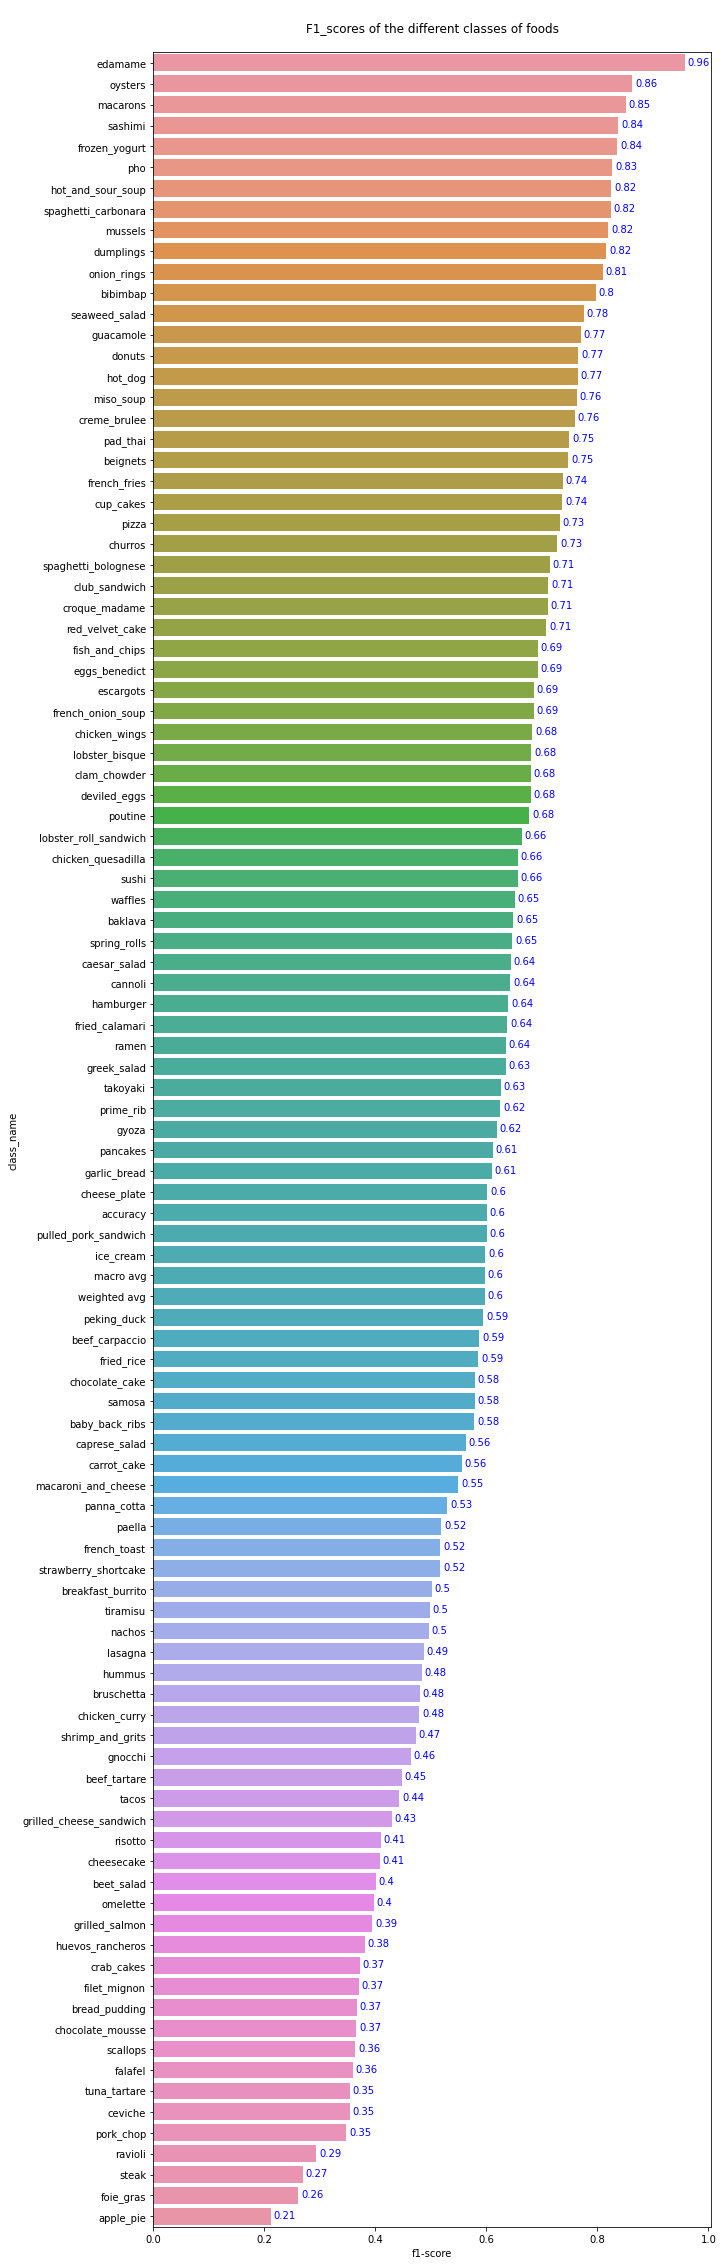

In [ ]:
x = report_f1.index
y = report_f1['f1-score']

plt.figure(figsize = (10,40))
ax = sns.barplot(x = y, y = x, order = x)

for i, v in enumerate(y):
    ax.text(v + 0.005, i + 0.1, str(round(v,2)), color='b', fontsize=10)

ax.set_title('\nF1_scores of the different classes of foods\n');

> lets load in custom images and do the predictions

Lets write a function to load and preprocess the custom images

In [ ]:
def load_prep_image(file_path, image_size = (224,224), color_channel = 3, rescale = True):

  # load the file in
  img = tf.io.read_file(file_path)

  # decode the file into an image
  img = tf.image.decode_image(img, channels = color_channel)

  # resize image
  img = tf.image.resize(img, size = image_size)

  # rescale
  if rescale :
    return img/225.0
  else:
    return img

Vizualising our predictions with random images

1/1 [==============================] - 0s 29ms/step


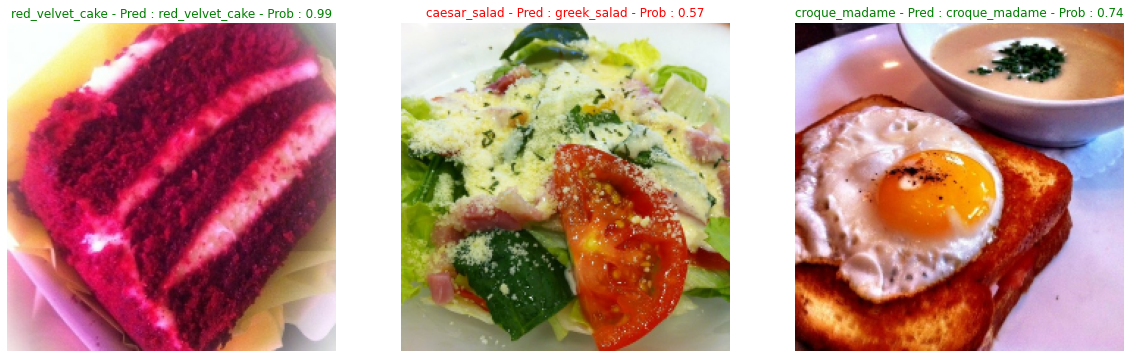

In [ ]:
plt.figure(figsize = (20,10))
for i in range(0,3):

  random_class = random.choice(class_names)
  random_item = random.choice(os.listdir(test_dir+'/'+random_class))
  random_path = test_dir+'/'+random_class+'/'+random_item

  random_image = load_prep_image(file_path = random_path,rescale = False)

  image_reshaped = tf.expand_dims(random_image,axis = 0)

  pred = loaded_model.predict(image_reshaped)

  prob = pred.max()

  pred_class = class_names[pred.argmax()]

  if pred_class == random_class:
    title_color = 'g'
  else:
    title_color = 'r'

  plt.subplot(1,3,i+1)
  image_normalized = random_image/255.0
  plt.imshow(image_normalized)
  plt.title(f"{random_class} - Pred : {pred_class} - Prob : {prob:.2f}", color = title_color)
  plt.axis(False);

> Lets look at the wrong predictions

we need to create a dataframe containing all the details

In [ ]:
test_dir

'101_food_classes_10_percent/test'

In [ ]:
# first * stands for all the class folders and the second * stands for all the classes
path_pattern = test_dir+'/*/*.jpg'
path_pattern

'101_food_classes_10_percent/test/*/*.jpg'

In [ ]:
filepath_list = list(test_data.list_files(path_pattern, 
                                          shuffle = False))
filepath_list[:10]

[<tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/1011328.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/101251.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/1034399.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/103801.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/1038694.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/1047447.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/1068632.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/110043.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/test/apple_pie/1106961.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'101_food_classes_10_percent/tes

In [ ]:
paths = []

for path in filepath_list:
  paths.append(path.numpy())

print(len(paths))
paths[:10] 

25250


[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
pred_prob = pred_array.max(axis = 1)
print(len(pred_prob))
pred_prob

25250


array([0.24420029, 0.8802965 , 0.38751912, ..., 0.3355744 , 0.314473  ,
       0.5589562 ], dtype=float32)

In [ ]:
print(len(test_labels))
test_class = [class_names[x] for x in test_labels]
test_class[:10]

25250


['apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie']

In [ ]:
print(len(pred_labels))
pred_class = [class_names[x] for x in pred_labels]
pred_class[:10]

25250


['apple_pie',
 'apple_pie',
 'apple_pie',
 'fish_and_chips',
 'bread_pudding',
 'poutine',
 'cup_cakes',
 'macaroni_and_cheese',
 'baklava',
 'apple_pie']

Lets create the datafarme

In [ ]:
pred_df = pd.DataFrame({'path':paths,'actual_class':test_class,'pred_class':pred_class,'prob':pred_prob})
pred_df

path actual_class  \
0      b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
1      b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
2      b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
3      b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
4      b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
...                                                  ...          ...   
25245  b'101_food_classes_10_percent/test/waffles/942...      waffles   
25246  b'101_food_classes_10_percent/test/waffles/954...      waffles   
25247  b'101_food_classes_10_percent/test/waffles/961...      waffles   
25248  b'101_food_classes_10_percent/test/waffles/970...      waffles   
25249  b'101_food_classes_10_percent/test/waffles/971...      waffles   

             pred_class      prob  
0             apple_pie  0.244200  
1             apple_pie  0.880297  
2             apple_pie  0.387519  
3        fish_and_chips  0.239807  
4         bread_pudding  0.507392  
...                 ...       ...  
25245           waffles  0.989240  
25246      cheese_plate  0.926380  
25247  huevos_rancheros  0.335574  
25248           waffles  0.314473  
25249           waffles  0.558956  

[25250 rows x 4 columns]

In [ ]:
pred_df['true_predict'] = pred_df['actual_class'] == pred_df['pred_class']
pred_df.head()

path actual_class  \
0  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
1  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
2  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
3  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
4  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   

       pred_class      prob  true_predict  
0       apple_pie  0.244200          True  
1       apple_pie  0.880297          True  
2       apple_pie  0.387519          True  
3  fish_and_chips  0.239807         False  
4   bread_pudding  0.507392         False

> lets create a dataframe for showing up the wrong predictions

In [ ]:
wrong_pred_df = pred_df[pred_df['true_predict'] == False]
wrong_pred_df.head()

path actual_class  \
3  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
4  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
5  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
6  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   
7  b'101_food_classes_10_percent/test/apple_pie/1...    apple_pie   

            pred_class      prob  true_predict  
3       fish_and_chips  0.239807         False  
4        bread_pudding  0.507392         False  
5              poutine  0.627829         False  
6            cup_cakes  0.840355         False  
7  macaroni_and_cheese  0.238633         False

In [ ]:
wrong_pred_df.sort_values(by = 'prob', ascending = False, inplace = True)
wrong_pred_df.head()

path  \
18001  b'101_food_classes_10_percent/test/pancakes/10...   
23797  b'101_food_classes_10_percent/test/sushi/16593...   
17855  b'101_food_classes_10_percent/test/paella/2314...   
10847  b'101_food_classes_10_percent/test/fried_calam...   
23631  b'101_food_classes_10_percent/test/strawberry_...   

               actual_class       pred_class      prob  true_predict  
18001              pancakes         omelette  0.998976         False  
23797                 sushi          sashimi  0.998846         False  
17855                paella          mussels  0.997975         False  
10847        fried_calamari      onion_rings  0.997099         False  
23631  strawberry_shortcake  red_velvet_cake  0.996902         False

In [ ]:
wrong_pred_df.reset_index(inplace = True, drop = True)
wrong_pred_df.head()

path          actual_class  \
0  b'101_food_classes_10_percent/test/pancakes/10...              pancakes   
1  b'101_food_classes_10_percent/test/sushi/16593...                 sushi   
2  b'101_food_classes_10_percent/test/paella/2314...                paella   
3  b'101_food_classes_10_percent/test/fried_calam...        fried_calamari   
4  b'101_food_classes_10_percent/test/strawberry_...  strawberry_shortcake   

        pred_class      prob  true_predict  
0         omelette  0.998976         False  
1          sashimi  0.998846         False  
2          mussels  0.997975         False  
3      onion_rings  0.997099         False  
4  red_velvet_cake  0.996902         False

> Lets visualize the worng prediction with higher probability

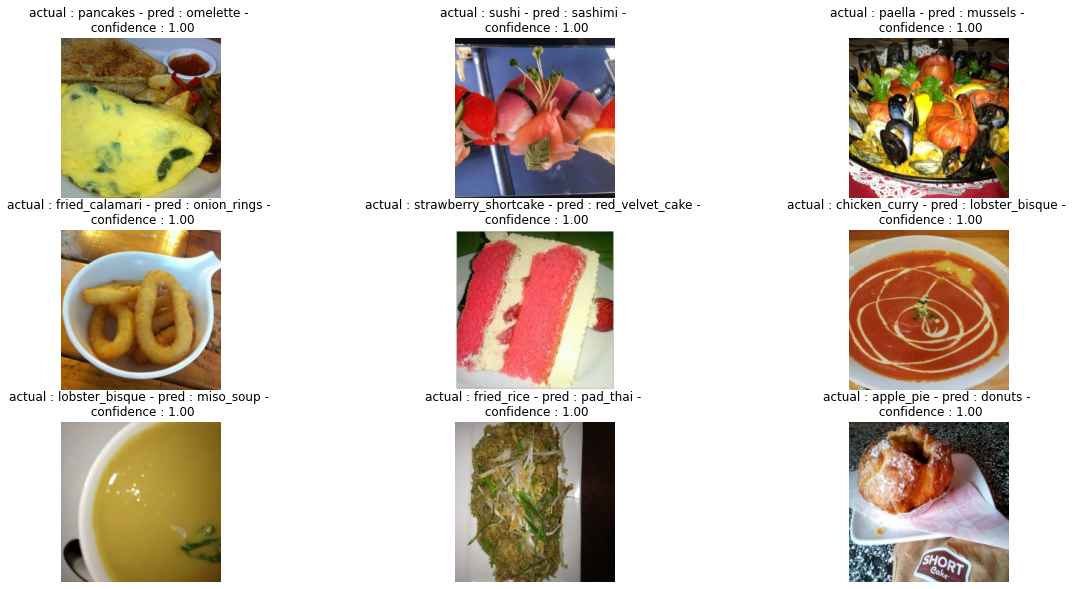

In [ ]:
start_index = 0
items_count = 9

plt.figure(figsize = (20,10))
for ind,pos in enumerate(range(start_index, start_index+items_count)):
  path = wrong_pred_df.iloc[pos]['path']
  actual_class = wrong_pred_df.iloc[pos]['actual_class']
  pred_class = wrong_pred_df.iloc[pos]['pred_class']
  confidence = wrong_pred_df.iloc[pos]['prob']

  plt.subplot(3,3,ind+1)
  img = load_prep_image(path, rescale = False)
  img = img/255.0
  plt.imshow(img)
  plt.title(f'actual : {actual_class} - pred : {pred_class} - \n confidence : {confidence:.2f}')
  plt.axis(False);

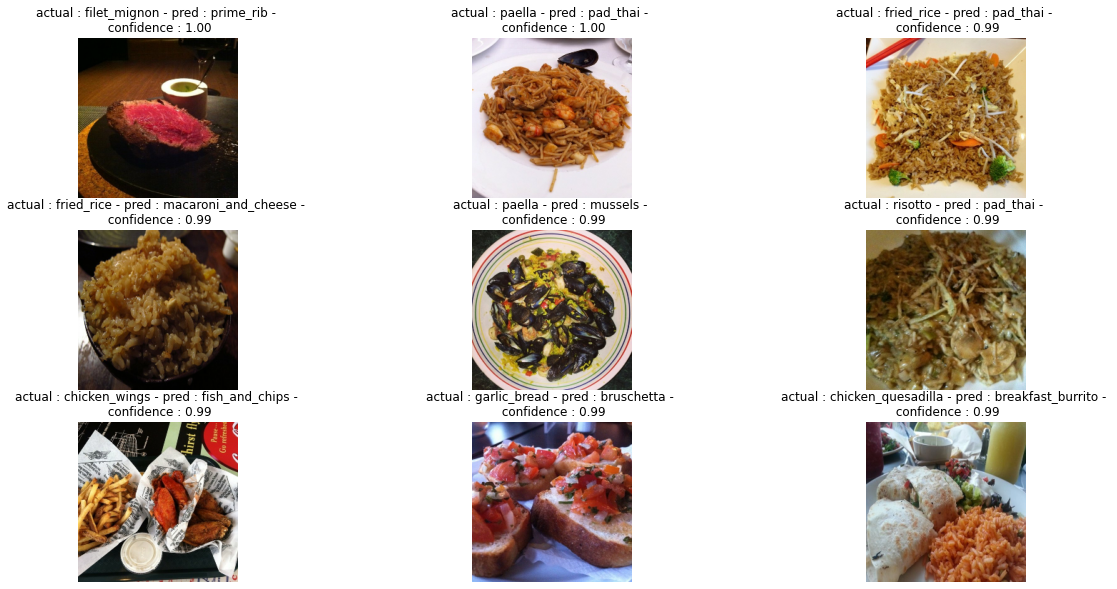

In [ ]:
start_index = 9
items_count = 9

plt.figure(figsize = (20,10))
for ind,pos in enumerate(range(start_index, start_index+items_count)):
  path = wrong_pred_df.iloc[pos]['path']
  actual_class = wrong_pred_df.iloc[pos]['actual_class']
  pred_class = wrong_pred_df.iloc[pos]['pred_class']
  confidence = wrong_pred_df.iloc[pos]['prob']

  plt.subplot(3,3,ind+1)
  img = load_prep_image(path, rescale = False)
  img = img/255.0
  plt.imshow(img)
  plt.title(f'actual : {actual_class} - pred : {pred_class} - \n confidence : {confidence:.2f}')
  plt.axis(False);

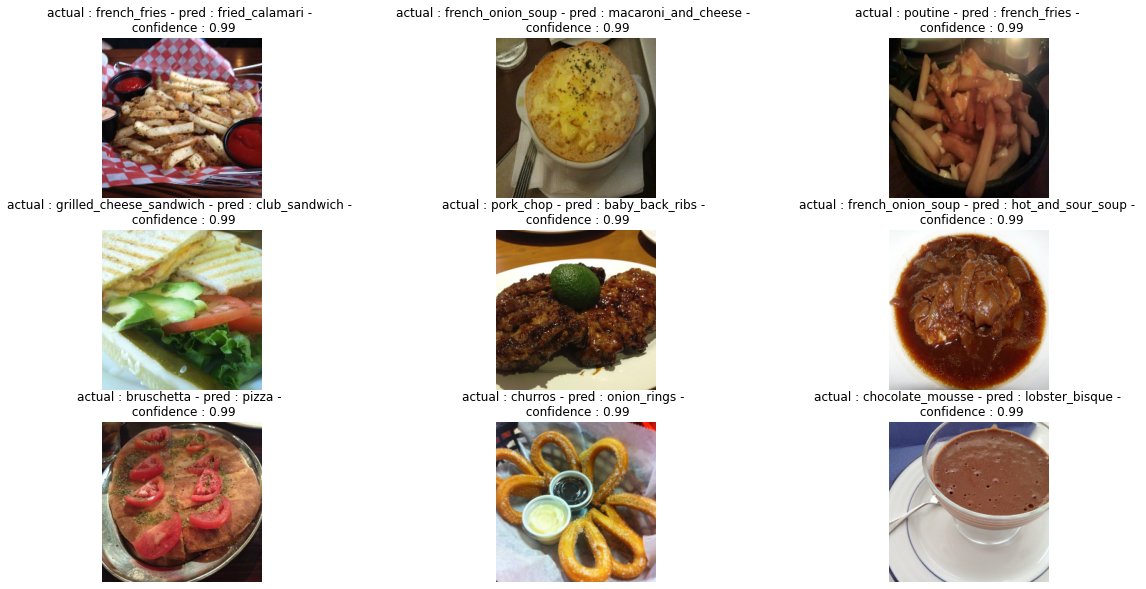

In [ ]:
start_index = 18
items_count = 9

plt.figure(figsize = (20,10))
for ind,pos in enumerate(range(start_index, start_index+items_count)):
  path = wrong_pred_df.iloc[pos]['path']
  actual_class = wrong_pred_df.iloc[pos]['actual_class']
  pred_class = wrong_pred_df.iloc[pos]['pred_class']
  confidence = wrong_pred_df.iloc[pos]['prob']

  plt.subplot(3,3,ind+1)
  img = load_prep_image(path, rescale = False)
  img = img/255.0
  plt.imshow(img)
  plt.title(f'actual : {actual_class} - pred : {pred_class} - \n confidence : {confidence:.2f}')
  plt.axis(False);